# Step by Step Exploratory Data Analysis on Titanic Dataset

Exploratory data analysis is an approach to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

To analyze the Titanic dataset, we will use Pandas, Seaborn, Math, Numpy, Pyplot from Matplotlib and Stats from Scipy.


In [1]:
import pandas as pd
import seaborn as sns
import math as math
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline


In [2]:
df = pd.read_csv('../data/titanic.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that Titanic dataset has 11 columns and 891 observations.  There are also missing values on Age and Cabin column.

To get a better idea about the data set, we will use the head function of dataframe, which will return the first 5 rows.

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


To identify the unique values of selected variables, we will use Python's built-in enumerate method.  When we run this, we will also see whether there are null values.

In [5]:
var_tup = ('Survived', 'Pclass', 'Sex', 'Parch', 'Embarked', 'Cabin', 'SibSp')

for idx, val in enumerate(var_tup):
    print("{}: {}".format(var_tup[idx], df[val].unique()))

Survived: [0 1]
Pclass: [3 1 2]
Sex: ['male' 'female']
Parch: [0 1 2 5 3 4 6]
Embarked: ['S' 'C' 'Q' nan]
Cabin: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 

Using isnull() method will allow us to see whether there are null values represented by 'True.'

In [6]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


To visualize the null values, we can use Seaborn heatmap.  The yellow broken bar graph shows the rows or observations with missing values.

<AxesSubplot:>

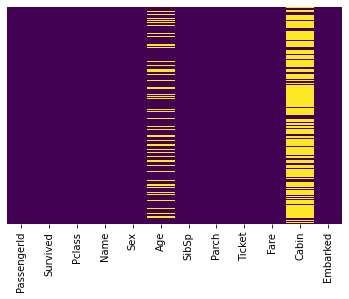

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

Another way to know the percentage of null values is by dividing the sum of null values by the number of observations in each column, then multiplied by 100%.

We can see below that there are 77.10% null values on Cabin, 19.87% on Age column and 0.22% on Embarked.

In [8]:
print("Percentages of missing values:")
print(round (df.isnull().sum().sort_values(ascending=False)/len(df)*100,2))

Percentages of missing values:
Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64


Based on the visual graph and numeric graph we've displayed, it is visible that Cabin, Embarked and Age have null values.  

Let us now proceed to deleting the columns we will not include in our analysis such as Cabin, Embarked, Ticket and PassengerID.  

In [9]:
col_del = ('Cabin', 'Embarked', 'PassengerId', 'Ticket')

for idx, val in enumerate(col_del):
    df.drop( col_del[idx], axis=1, inplace=True)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


After deleting the unnecessary variables, we will now be checking the remaining column with null values.  On the heatmap below, it appears that 'Age' is the remaining column with null values.  We will not delete this as it's useful in our exploratory data analysis.  We would like to know whether 'age' influences the survival rate of each passenger.

<AxesSubplot:>

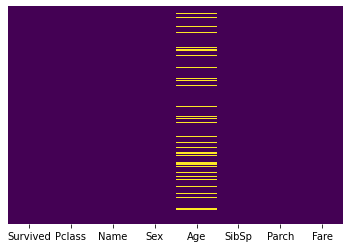

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

Now, let us fix the missing values on Age by examining it closely.

Based on the numerical graph below, we can see the mean age of each Pclass before Titanic sank.  On our numerical graph, we can see that those who survived are younger than those who didn't.  Pclass 1 and 2 who survived are approximately 8 years younger than those who didn't based on the mean value.  For Pclass 3 who survived, they are approximately 6 years younger based on the mean value.

                 mean  median
Survived Pclass              
0        1       43.7    45.2
         2       33.5    30.5
         3       26.6    25.0
1        1       35.4    35.0
         2       25.9    28.0
         3       20.6    22.0


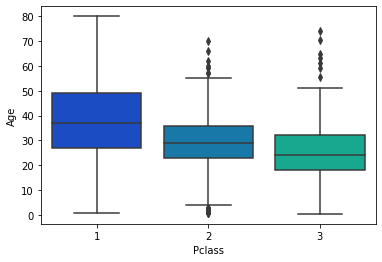

In [21]:
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

# Shows the mean (from 0 to 1) survival rate for each Class
# Class 1 has the highest survival rate, followed by class 2, then class 1
print(df.groupby(['Survived', 'Pclass'])['Age'].agg(['mean', 'median']).round(1))


## Imputing Age

Before imputing the missing values on Age column, first, we should know that each passenger are addressed by their title.  Let's create a separate column for their title so this can give us a better way of imputing Age column.

In [23]:
df['Titles'] = df['Name'].str.extract(r', (\w+\.)')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Titles
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Mr.
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,Rev.
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,Miss.
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,Miss.
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,Mr.


In [24]:
print("Percentages of missing values:")
print(round (df.isnull().sum().sort_values(ascending=False)/len(df)*100,2))

Percentages of missing values:
Age         19.87
Titles       0.11
Survived     0.00
Pclass       0.00
Name         0.00
Sex          0.00
SibSp        0.00
Parch        0.00
Fare         0.00
dtype: float64


There is 0.11% missing value on Titles. Let's fix that by identifying the index value of the null value in Titles column.  Once the name appears, let's find out whether we can apply the necessary title.

In [26]:
title_miss = df[df['Titles'].isnull()].index.values # index number of missing value on Title
print("Index number of Rothes: {}".format(title_miss))
print(df.loc[int(title_miss), 'Name']) # prints the name of missing value

Index number of Rothes: [759]
Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)


the Countess. of may have a title of "Miss", so let's apply that to this passenger.

In [28]:
# only run this code once so that it won't produce errors
# filling 'Miss' to data with missing val
df.at[int(title_miss), 'Titles']='Miss'
df.at[int(title_miss), 'Titles']

# should show no missing value on 'Titles' column
print("Percentages of missing values:")
print(round (df.isnull().sum().sort_values(ascending=False)/len(df)*100,2))

Percentages of missing values:
Age         19.87
Survived     0.00
Pclass       0.00
Name         0.00
Sex          0.00
SibSp        0.00
Parch        0.00
Fare         0.00
Titles       0.00
dtype: float64


To prevent ourselves from overwriting the df, let's make a copy of it and assign it a different name.

In [29]:
titan_df = df.copy()

In [30]:
# mean - Age - of young boys, girls, women and men
# Getting the mean can be improved if we add a condition that young girls', women's and men's fees are also based on their Pclass and Fare amount
# In this EDA, we will not include such condition, but only base them on their Title, Sex, and Parch (accompanied by the number of parents)
mean_age_boys = math.floor(titan_df[ 
    (titan_df['Parch']!=0) & 
    (titan_df['Sex']=='male') & 
    (titan_df['Titles']=='Master.')]['Age'].mean())
mean_age_girls = math.floor(titan_df[ 
    (titan_df['Parch']!=0) & 
    (titan_df['Sex']=='female')  ]['Age'].mean())
mean_age_women = math.floor(titan_df [ 
    (titan_df['Parch']==0) & 
    (titan_df['Sex']=='female') ]['Age'].mean())
mean_age_boys_not_mister = math.floor(titan_df[
    (titan_df['Parch']!=0) &
    (titan_df['Sex']=='male') &
    (titan_df['Titles']!='Master.')]['Age'].mean())
mean_age_men = math.floor(titan_df [ 
    (titan_df['Parch']==0) & 
    (titan_df['Sex']=='male') ]['Age'].mean())

print(mean_age_boys, mean_age_girls, mean_age_boys_not_mister, mean_age_women, mean_age_men)


4 23 34 30 32


In [31]:
a_value = float('NaN')
is_NaN = math.isnan(float('NaN'))

# Assign value to 'Age'
# 1. Determine the mean of boys that meets the following conditions:
#          - 'Title' = Master ---> mean of all M & Parch > 0 & Title == Master
# 2. Determine the mean of girls that meets the following conditions:
#          - girls (mean) ---> F & Parch != 0
# 3. Determine the mean of women (without parents) that meets the following conditions:
#          - women (mean) ---> F & Parch == 0 
# 4. Determine the mean of men (without parents) that meets the following conditions:
#          - men (mean) -----> M & Parch == 0

# shows unique values of 'Title'
titan_df['Titles'].unique()

for row in titan_df.index:
    if ( math.isnan (titan_df['Age'][row])==True  ):
        # fills the mean age for for young boys
        if ( titan_df['Titles'][row] == 'Master.' ) :
            #titan_df.at[row,'Age']=mean_age_boys -- this is used for Series
            titan_df.loc[row, 'Age'] = mean_age_boys
            #print( titan_df['Age'][row] )
            #print( row)
        elif ( titan_df['Sex'][row] == 'female'  ):
            # fills the mean age for girls
            if ( titan_df['Parch'][row]!=0 ):
                titan_df.loc[row, 'Age'] = mean_age_girls
            # fills the mean age for women
            elif ( titan_df['Parch'][row]==0 ):
                titan_df.loc[row, 'Age'] = mean_age_women     
        elif ( (titan_df['Sex'][row]=='male') & (titan_df['Parch'][row]==0) ):
            titan_df.loc[row, 'Age'] = mean_age_men
        elif ( (titan_df['Sex'][row]=='male') & (titan_df['Parch'][row]!=0) & (titan_df['Titles'][row]!='Master.') ):    
            titan_df.loc[row, 'Age'] = mean_age_boys_not_mister

            

In [32]:
titan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Titles    891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


After imputing the age, we will now see a slight difference on the mean values of each class who survived and did not.

In [33]:
# Shows the mean (from 0 to 1) survival rate for each Class
# Class 1 has the highest survival rate, followed by class 2, then class 1
print(titan_df.groupby(['Survived', 'Pclass'])['Age'].agg(['mean', 'median']).round(1))


                 mean  median
Survived Pclass              
0        1       41.4    38.5
         2       33.4    32.0
         3       27.7    30.0
1        1       34.8    33.5
         2       26.1    28.0
         3       22.9    26.0


## Correlation

Now, let's proceed to find the correlation of all the numerical variables by using heatmap and finding the p-value.

<AxesSubplot:>

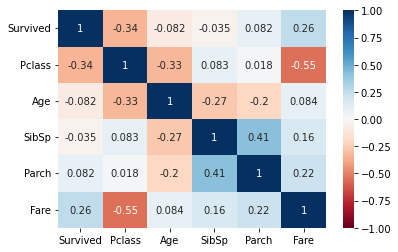

In [35]:

# Heatmap for all numerical variables
# Pclass and survival rate plotting
# Survival and Pclass are negatively correlated with one another (-0.34). The lower the class (the richer you are), the higher your survival rate (0 lowest, 1 highest) is
# Survival and Fare are positively correlated with one another (0.26). The higher the fare is paid, the greater chances of surviving.
sns.heatmap(titan_df.corr(), cmap="RdBu", annot=True, center=0, vmin=-1, vmax=1)


There is a moderate POSITIVE linear relationship between:
- SibSp and Parch

There is a weak POSITIVE linear relationship between the following:
- Fare and Survival rate
- Fare and SibSp
- Fare and Parch

There is a moderate NEGATIVE linear relationship between the following:
- Pclass and Survived
- Pclass and Age
- Pclass and Fare

There is a weak NEGATIVE linear relationship between:
- Age and Parch


When we run the code below, we will see a small p-value (smaller than 5%).  This means,our correlation coefficients above are statistically significant.  It is less likely by chance that the stated positive and negative relationships above occurred.

### Inference:
**Positive**

- The higher siblings there are, the more likely the person was accompanied by a parent.
- The higher your fare is, the more likely are you to survive.
- The higher your fare is, the more likely you have a sibling.
- The higher your fare is, the more likely you are accompanied by a parent.

**Negative**
- The higher your class is (3rd class), the less likely you are to survive.
- The higher your class is (3rd class), the younger you are.
- The higher yoru class is (3rd class), the cheaper your fare is.
- The older you are, the less likely you are accompanied by a parent.

In [40]:
r, p = stats.pearsonr(titan_df.SibSp, titan_df.Parch)
print("Correlation between SibSp and Parch: {}".format(round(r, 2)))
print("P-value of SipSp and Parch: {}".format(round(p, 2)))

r, p = stats.pearsonr(titan_df.Fare, titan_df.Survived)
print("Correlation between Fare and Survived: {}".format(round(r, 2)))
print("P-value of Fare and Survived: {}".format(round(p, 2)))

r, p = stats.pearsonr(titan_df.Fare, titan_df.SibSp)
print("Correlation between Fare and SibSp: {}".format(round(r, 2)))
print("P-value of Fare and SibSp: {}".format(round(p, 2)))

r, p = stats.pearsonr(titan_df.Fare, titan_df.Parch)
print("Correlation between Fare and Parch: {}".format(round(r, 2)))
print("P-value of Fare and Parch: {}".format(round(p, 2)))

r, p = stats.pearsonr(titan_df.Pclass, titan_df.Survived)
print("Correlation between Pclass and Survived: {}".format(round(r, 2)))
print("P-value of Pclass and Survived: {}".format(round(p, 2)))

r, p = stats.pearsonr(titan_df.Pclass, titan_df.Age)
print("Correlation between Pclass and Age: {}".format(round(r, 2)))
print("P-value of Pclass and Age: {}".format(round(p, 2)))

r, p = stats.pearsonr(titan_df.Pclass, titan_df.Fare)
print("Correlation between Pclass and Fare: {}".format(round(r, 2)))
print("P-value of Pclass and Fare: {}".format(round(p, 2)))

r, p = stats.pearsonr(titan_df.Age, titan_df.Parch)
print("Correlation between Age and Parch: {}".format(round(r, 2)))
print("P-value of Age and Parch: {}".format(round(p, 2)))



Correlation between SibSp and Parch: 0.41
P-value of SipSp and Parch: 0.0
Correlation between Fare and Survived: 0.26
P-value of Fare and Survived: 0.0
Correlation between Fare and SibSp: 0.16
P-value of Fare and SibSp: 0.0
Correlation between Fare and Parch: 0.22
P-value of Fare and Parch: 0.0
Correlation between Pclass and Survived: -0.34
P-value of Pclass and Survived: 0.0
Correlation between Pclass and Age: -0.33
P-value of Pclass and Age: 0.0
Correlation between Pclass and Fare: -0.55
P-value of Pclass and Fare: 0.0
Correlation between Age and Parch: -0.2
P-value of Age and Parch: 0.0


# More Tables and Visualizations

We will now show the number of passenger before Titanic even sank into the deep.

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

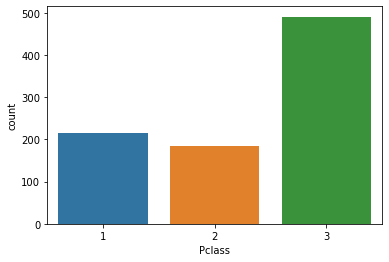

In [46]:
# -------------------------------
# Overview of number of passengers in each class
# -------------------------------
# shows the frequency of each Pclass using Bargraph (or countplot)
# The most number of passengers are distributed on the 3rd class

# Shows the number of passengers in each class for both who survived and not

print(titan_df['Pclass'].value_counts())

sns.countplot(x="Pclass", data=titan_df)



In [48]:
# Total number of those who survived  in each variable
titan_df[titan_df['Survived']==1].count()

Survived    342
Pclass      342
Name        342
Sex         342
Age         342
SibSp       342
Parch       342
Fare        342
Titles      342
dtype: int64

In [49]:
# Total number of those who did not survive in each variable
titan_df[titan_df['Survived']==0].count()

Survived    549
Pclass      549
Name        549
Sex         549
Age         549
SibSp       549
Parch       549
Fare        549
Titles      549
dtype: int64

In [51]:
# Sum of all who survived

titan_df['Survived'].sum()

342

## Survival Rate and Passenger Class

<AxesSubplot:xlabel='Survived', ylabel='count'>

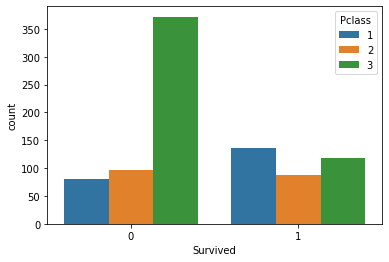

In [53]:
# 1 represents those who survived.  There are more Class 1 who survived
# 0 represents those who were not alive.  The least least survival rate belongs to Class 3

sns.countplot(x='Survived', data=titan_df, hue='Pclass')

In [55]:
# Shows the mean (from 0 to 1) survival rate for each Class
# Class 1 has the highest survival rate, followed by class 2, then class 1

print(titan_df[['Pclass','Survived']].groupby('Pclass').mean())

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


## General view of survival rate on Sex, Pclass and mean of Age

In [56]:
print(titan_df.groupby(['Survived', 'Sex', 'Pclass'])['Age'].agg(['mean', 'median']).round(1))

                        mean  median
Survived Sex    Pclass              
0        female 1       25.7    25.0
                2       36.0    32.5
                3       24.4    23.0
         male   1       42.0    39.0
                2       33.3    32.0
                3       28.4    32.0
1        female 1       34.4    33.0
                2       28.1    28.5
                3       22.8    26.0
         male   1       35.8    35.0
                2       17.9     8.0
                3       22.9    26.0


## Survival Rate and (Sex and Passenger Class and Fare)

<AxesSubplot:xlabel='Survived', ylabel='count'>

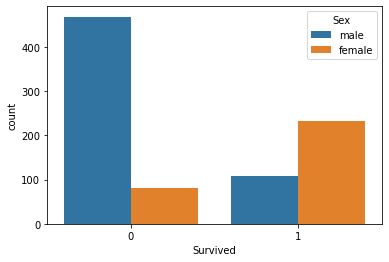

In [57]:
sns.countplot(x='Survived', data=titan_df, hue='Sex')

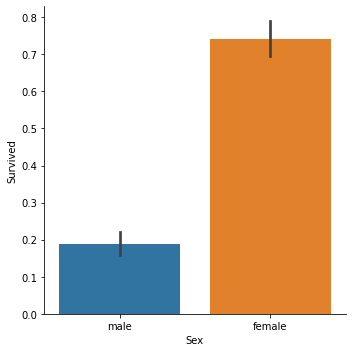

In [58]:
sns.catplot(x="Sex", y="Survived", kind="bar", data=titan_df)

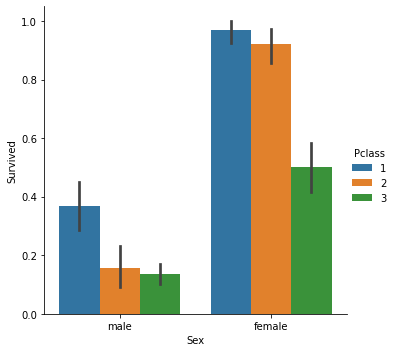

In [59]:
# Shows survival rate is higher in females than in males
# Shows that Class 1 has the most number of survival for both male and female, followed by class 2
# The least survivors are males who belong to Class 3; This is similar with females who belong to Class 3

sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=titan_df)

In [61]:
table = pd.pivot_table(titan_df,index=['Sex'], aggfunc={'Age':np.mean, 'Fare':np.mean, 'Survived':np.sum})
table

,Age,Fare,Survived
Sex,,,
female,28.000000,44.479818,233
male,30.820052,25.523893,109


In [63]:
# Table below shows us the mean of each Sex (male and female), Passenger Class (1,2,3) and the number of those who survived in each group

table = pd.pivot_table(titan_df,index=['Sex','Pclass'], aggfunc={'Age':np.mean, 'Fare':np.mean, 'Survived':np.sum})
table

Age        Fare  Survived
Sex    Pclass                                 
female 1       34.095745  106.125798        91
       2       28.756579   21.970121        70
       3       23.621528   16.118810        72
male   1       39.683770   67.226127        45
       2       30.845648   19.741782        17
       3       27.695735   12.661633        47

## Survival Rate (Age and Pclass)

In [65]:
# different aggregate functions
table = pd.pivot_table(titan_df,index=['Sex','Pclass'],aggfunc={'Age':np.mean,'Survived':np.sum})
table

Age  Survived
Sex    Pclass                     
female 1       34.095745        91
       2       28.756579        70
       3       23.621528        72
male   1       39.683770        45
       2       30.845648        17
       3       27.695735        47

In [68]:
titan_df.to_csv('../result/clean_titan_df.csv')